In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAMOS LIBRERIAS DE SKLEARN

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# CARGAMOS EL DATASET

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,sep='\s+')
df.columns =  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# EDA

In [4]:
df.isna().sum().sum()

0

## CORRELACIONES

<Axes: >

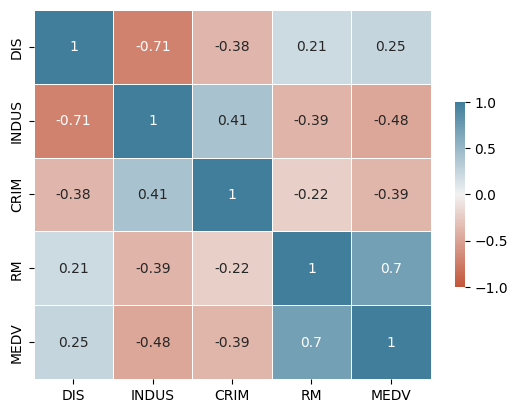

In [5]:
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
sns.heatmap(
    data=df[cols].corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

<Axes: xlabel='RM', ylabel='MEDV'>

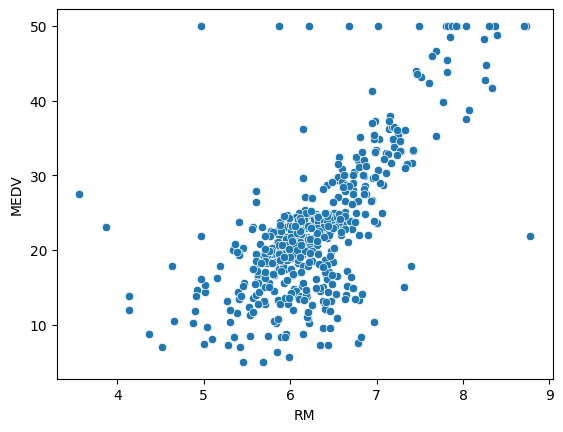

In [6]:
sns.scatterplot(data=df,x=df['RM'],y=df['MEDV'])

# CREANDO EL MODULO DE REGRESIÓN LINEAL CON SKLEARN
## X = RM(Promedio de habitaciones en el departamento)
## Y = MEDV(Valor promedio del departamento)

In [7]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

# ESTANDARIZAMOS LOS VALORES

In [8]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)


# CREAMOS EL MODELO DE REGRESIÓN LINEAL

In [9]:
slr = LinearRegression()
slr.fit(X_std,y_std)
slr.predict(X_std)

array([[ 2.87650863e-01],
       [ 1.35090673e-01],
       [ 8.91947718e-01],
       [ 7.06696059e-01],
       [ 8.54302996e-01],
       [ 1.44006529e-01],
       [-2.70085414e-01],
       [-1.11581321e-01],
       [-6.47523286e-01],
       [-2.78010619e-01],
       [ 9.15020479e-02],
       [-2.73057366e-01],
       [-3.91935436e-01],
       [-3.32496401e-01],
       [-1.86870766e-01],
       [-4.46421218e-01],
       [-3.46365509e-01],
       [-2.91879727e-01],
       [-8.20887138e-01],
       [-5.52420830e-01],
       [-7.07952971e-01],
       [-3.16645992e-01],
       [-1.41300839e-01],
       [-4.67224880e-01],
       [-3.57262666e-01],
       [-6.79224105e-01],
       [-4.67224880e-01],
       [-2.35412644e-01],
       [ 2.08398817e-01],
       [ 3.85725271e-01],
       [-5.66289938e-01],
       [-2.10646380e-01],
       [-3.31505750e-01],
       [-5.78177745e-01],
       [-1.86870766e-01],
       [-3.48346810e-01],
       [-4.39486664e-01],
       [-4.30570809e-01],
       [-3.1

# GRAFICAMOS LOS RESULTADOS

Text(0.5, 0, 'RM')

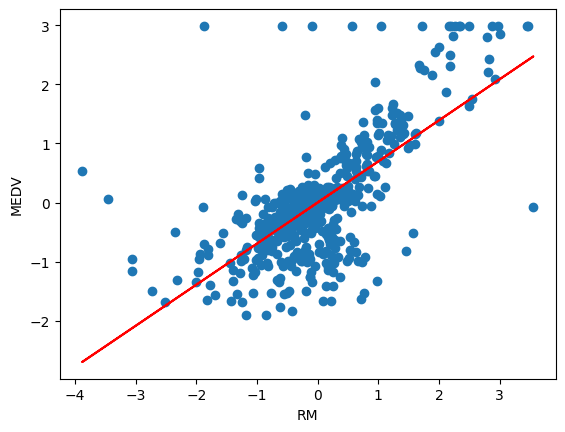

In [10]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std),color='red')
plt.ylabel('MEDV')
plt.xlabel('RM')

# PROBAMOS PREDICCIONES

In [11]:
num_hab = 6.998
num_hab_std = sc_x.transform(np.array([num_hab]).reshape(-1,1))
print(f" EL PRECIO PARA UN DPTO CON {num_hab}  ES DE : {sc_y.inverse_transform(slr.predict(num_hab_std))}")

 EL PRECIO PARA UN DPTO CON 6.998  ES DE : [[29.02593787]]


# ENTRENAMOS NUESTRO MODELO DIVIENDO EL DATASET

In [12]:
from sklearn.model_selection import train_test_split

data = df.copy()
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [13]:
X = data['RM'].values.reshape(-1,1)
y = data['MEDV'].values.reshape(-1,1)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [15]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred.shape

(152, 1)

# METRICAS DEL MODELO

In [16]:
import sklearn.metrics as metrics

#erro cuadratico medio
mse = metrics.mean_squared_error(y_test,y_pred)
#R2 Coeficiente de determinación
r2 = metrics.r2_score(y_test,y_pred)

print(f'El error cuadratico medio(MSE) es de {round(mse,4)}')
print(f'El coeficiente de determinación(R2) es de {round(r2,4)}')


El error cuadratico medio(MSE) es de 0.5798
El coeficiente de determinación(R2) es de 0.4202
